# Predicting Energy Output using Multivariable Regression

Dataset is taken from UC Irvine Machine Learning Repository
- Link to the dataset : https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset

df = pd.read_excel("Folds5x2_pp.xlsx")

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [5]:
# Checking for null/missing values

df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
# Checking data types of each feature(columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# In the data, our columns are classified as follows:

### Feature columns -> `AT`,`V`,`AP`,`RH`
### Target column -> `PE`

In [8]:
# Seperating feature and target columns

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [10]:
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64

In [11]:
# Importing sklearn library and metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
# Performing train-test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Creating an object of Linear Regression Class 

lr = LinearRegression()

In [17]:
# Fitting training data to linear regression model

lr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predicting results by feeding X_test into the trained model

y_pred = lr.predict(X_test)

In [24]:
y_test

2513    455.27
9411    436.31
8745    440.68
9085    434.40
4950    482.06
         ...  
7204    430.24
1599    473.20
5697    479.53
350     435.76
6210    457.10
Name: PE, Length: 1914, dtype: float64

In [25]:
y_pred

array([455.68020791, 438.73212215, 434.16444   , ..., 482.16817365,
       435.41524413, 458.76150613])

In [26]:
# Checking goodness of fit using R2 Score

r2_score(y_test, y_pred)

0.9301046431962188

Text(0.5, 1.0, 'Actual vs Predicted graph')

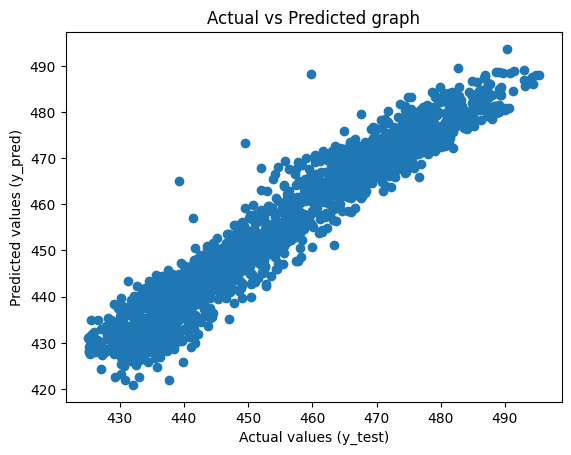

In [30]:
# Plotting y_test vs y_pred graph 

plt.scatter(y_test, y_pred)
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Actual vs Predicted graph')

## Insights

- R2 = 0.93 (approx) 
- y_test vs y_pred follows a linear relation following nearly the line of y=x. This show that predicted values are close to real values